# Homework 1

## Mohammed Oubia

## Direct Methods for the solution of Linear Systems.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

### 1. Given a matrix A ∈ R n×n and the vector xtrue = (1, 1, . . . , 1)T ∈ R n, write a script that:

In [2]:
n=10
A=np.random.rand(n, n)
x_true=np.ones(n)


• Computes the right-hand side of the linear system b = Axtrue


In [3]:
def compute_right_handside(A,x_true):
    return A@x_true

b=compute_right_handside(A,x_true)

• Computes the condition number in 2-norm of the matrix A. It is ill-conditioned? What if we use
the ∞-norm instead of the 2-norm?


In [4]:
norm_2=np.linalg.norm(A,2)
norm_inf=np.linalg.norm(A,np.inf)

• Solves the linear system Ax = b with the function np.linalg.solve().


In [5]:
x=np.linalg.solve(A,b)
print(x)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


• Computes the relative error between the solution computed before and the true solution xtrue.
Remember that the relative error between xtrue and x in R
n can be computed as
E(xtrue, x) = ||x − xtrue||2/||xtrue||2

In [6]:
error=np.linalg.norm(x-x_true,2)/np.linalg.norm(x_true,2)
print(error)

2.364540476657974e-15


• Plot a graph (using matplotlib.pyplot) with the relative errors as a function of n and (in a new
window) the condition number in 2-norm K2(A) and in ∞-norm, as a function of n

In [9]:
def cal_error(A,x_true,n):
    b=compute_right_handside(A,x_true)
    x=np.linalg.solve(A,b)
    error=np.linalg.norm(x-x_true,2)/np.linalg.norm(x_true,2)
    return error

def cal_cond(A,norm):
    return np.linalg.cond(A, norm)

### 2. Test the program above with the following choices of A ∈ R n×n:


• A random matrix (created with the function np.random.rand()) with size varying with n =
{10, 20, 30, . . . , 100}.

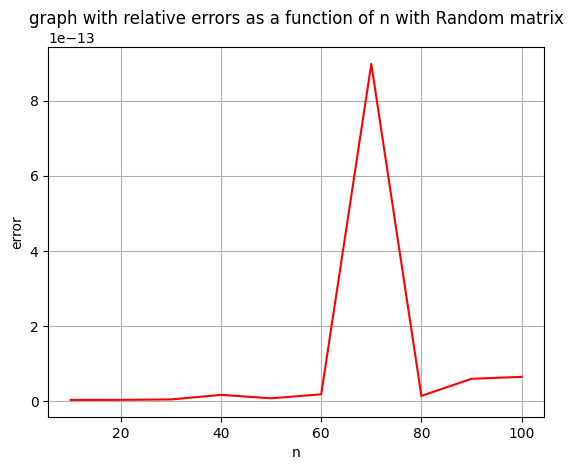

In [11]:
n_fun=np.arange(10,110,10)
errors=[cal_error(np.random.rand(i,i),np.ones(i),i) for i in n_fun ]
plt.plot(n_fun,errors,color="red")
plt.xlabel("n")
plt.ylabel("error")
plt.title("graph with relative errors as a function of n with Random matrix",color="black")
plt.grid()
plt.show()

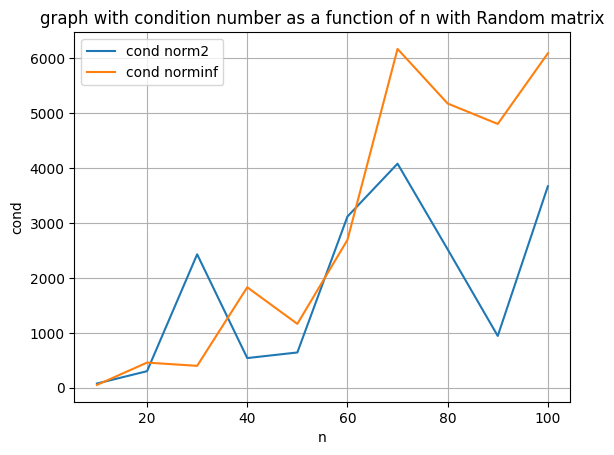

In [12]:
conds_2=[cal_cond(np.random.rand(i,i),2) for i in n_fun ]
conds_inf=[cal_cond(np.random.rand(i,i),np.inf) for i in n_fun ]
plt.plot(n_fun,conds_2,label="cond norm2")
plt.plot(n_fun,conds_inf,label="cond norminf")
plt.title("graph with condition number as a function of n with Random matrix",color="black")
plt.grid()
plt.xlabel("n")
plt.ylabel("cond")
plt.legend()
plt.show()

• The Vandermonde matrix (np.vander) of dimension n = {5, 10, 15, 20, 25, 30} with respect to the
vector x = {1, 2, 3, . . . , n}.

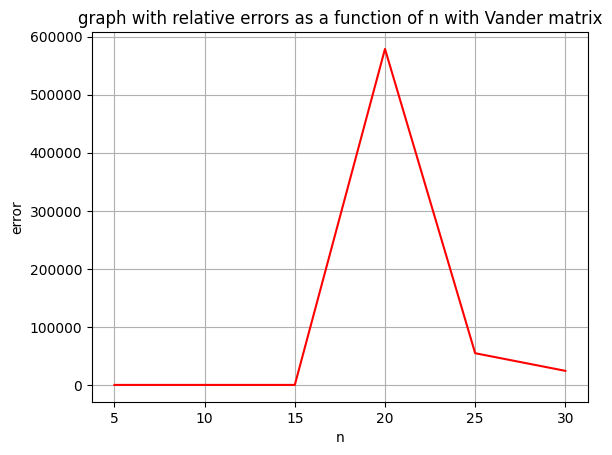

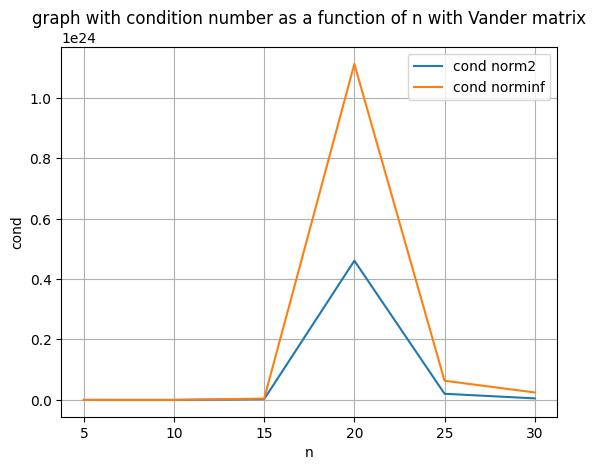

In [13]:
n_fun_vander=np.arange(5,35,5)
errors_vander=[cal_error(np.vander(np.array(range(1,i+1))),np.ones(i),i) for i in n_fun_vander]
plt.plot(n_fun_vander,errors_vander,color="red")
plt.xlabel("n")
plt.ylabel("error")
plt.grid()
plt.title("graph with relative errors as a function of n with Vander matrix",color="black")
plt.show()
conds_2_vander=[cal_cond(np.vander(np.array(range(1,i+1))),2) for i in n_fun_vander ]
conds_inf_vander=[cal_cond(np.vander(np.array(range(1,i+1))),np.inf) for i in n_fun_vander ]
plt.plot(n_fun_vander,conds_2_vander,label="cond norm2")
plt.plot(n_fun_vander,conds_inf_vander,label="cond norminf")
plt.xlabel("n")
plt.ylabel("cond")
plt.legend()
plt.grid()
plt.title("graph with condition number as a function of n with Vander matrix",color="black")
plt.show()

• The Hilbert matrix (scipy.linalg.hilbert) of dimension n = {4, 5, 6, . . . , 12}.

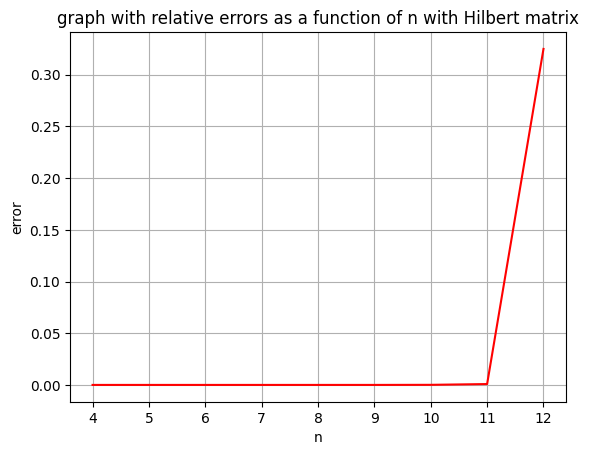

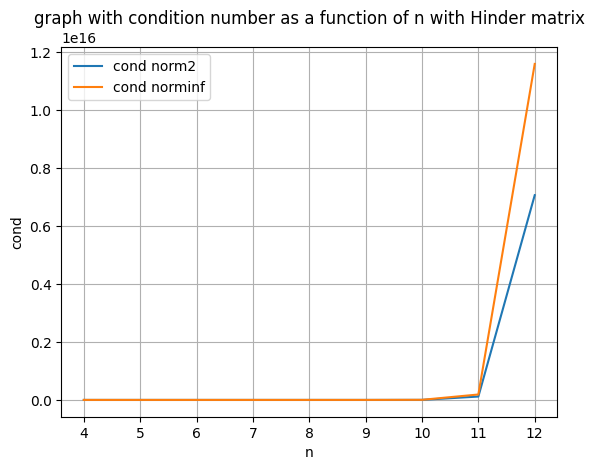

In [14]:
n_fun_hilbert=np.arange(4,13,1)
errors_hilbert=[cal_error(hilbert(i),np.ones(i),i) for i in n_fun_hilbert]
plt.plot(n_fun_hilbert,errors_hilbert,color="red")
plt.xlabel("n")
plt.ylabel("error")
plt.title("graph with relative errors as a function of n with Hilbert matrix",color="black")
plt.grid()
plt.show()
conds_2_hilbert=[cal_cond(np.vander(np.array(range(1,i+1))),2) for i in n_fun_hilbert ]
conds_inf_hilbert=[cal_cond(np.vander(np.array(range(1,i+1))),np.inf) for i in n_fun_hilbert ]
plt.plot(n_fun_hilbert,conds_2_hilbert,label="cond norm2")
plt.plot(n_fun_hilbert,conds_inf_hilbert,label="cond norminf")
plt.grid()
plt.xlabel("n")
plt.ylabel("cond")
plt.legend()
plt.title("graph with condition number as a function of n with Hinder matrix",color="black")
plt.show()


## Floating Point Arithmetic.


1. The Machine epsilon epsilon is the distance between 1 and the next floating point number. Compute , which
is defined as the smallest floating point number such that it holds:
fl(1 + epsilon) > 1
Tips: use a while structure.

In [15]:
epsilon=4
while (1+epsilon)>1:
    epsilon/=2
print(epsilon)

1.1102230246251565e-16


2. Let’s consider the sequence an = (1 + 1
n
)
n. It is well known that:
limn→∞
an = e

where e is the Euler costant. Choose different values for n, compute an and compare it to the real
value of the Euler costant. What happens if you choose a large value of n? Guess the reason.

In [16]:
def euler_apprx(n):
    return (1+1/n)**n
print(euler_apprx(1000))
print(euler_apprx(100000))
print(euler_apprx(100000000000000000))


2.7169239322355936
2.7182682371922975
1.0


We can see that value with huge value of n, the value go down to 1, this is because 1/n approach the machine precision so it remains 1**n

3. Let’s consider the matrices:
A =
(
4 2
1 3)
, B =
(
4 2
2 1)
Compute the rank of A and B and their eigenvalues. Are A and B full-rank matrices? Can you infer
some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate
your deduction with other examples.
Tips: Please, have a look at np.linalg.

In [19]:
A=np.array(((4,2),(1,3)))
B=np.array(((4,2),(2,1)))
eig_A,eigenvectors_A=np.linalg.eig(A)
eig_B,eigenvectors_B=np.linalg.eig(B)
print(eig_A,eig_B)

[5. 2.] [5. 0.]


A is a full rank matrix because it has 2 eigenvalues different from 0, thats because its row and columns are linearly independent, while B has 1 eigenvalue equal to 0, thats means tha the matrix has only rank 1.

In [20]:
rank_A=np.linalg.matrix_rank(A)
rank_B=np.linalg.matrix_rank(B)

In [21]:
print(f"The rank of matrix A is :{rank_A} The rank of matrix B is: {rank_B}")

The rank of matrix A is :2 The rank of matrix B is: 1


## End